**Dealing with Missing Data**

In [ ]:
"""Identifying missing values in tabular data"""

import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
 1.,2.,3.,4.
5.,6.,,8.
10.,11.,12.,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [ ]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [ ]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
df.dropna(how="all")

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(subset=["C"])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


**Imputing missing values**

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy="mean")
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


**Categorical data encoding with pandas**

In [ ]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ["color", "size", "price", "classlabel"]
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
size_mapping = {"XL":3,
                "L":2,
                "M":1}

In [ ]:
df["size"] = df["size"].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


**Encoding class labels**

In [ ]:
import numpy as np
class_mapping = {label: idx for idx, label in
                 enumerate(np.unique(df["classlabel"]))}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
df["classlabel"] = df["classlabel"].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [ ]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df["classlabel"] = df["classlabel"].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df["classlabel"].values)
y

array([1, 0, 1])

In [ ]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [ ]:
X = df[["color", "size", "price"]].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = df[["color", "size", "price"]].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
from sklearn.compose import ColumnTransformer
X = df[["color", "size", "price"]].values
c_transf = ColumnTransformer([
    ("onehot", OneHotEncoder(), [0]),
    ("nothing", "passthrough", [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [ ]:
pd.get_dummies(df[["price", "color", "size"]])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [ ]:
pd.get_dummies(df[["price", "color", "size"]],
               drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [ ]:
color_ohe = OneHotEncoder(categories="auto", drop="first")
c_trasnf = ColumnTransformer([
    ("onehot", color_ohe, [0],
     ("nothing", "passthrough", [1, 2]))
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [ ]:
df = pd.DataFrame([["gree", "M", 10.1,
                    "class2"],
                    ["red", "L", 13.5,
                     "class1"],
                    ["blue", "XL", 15.3,
                     "class2"]])
df.columns = ["color", "size", "price", "classlabel"]
df

,color,size,price,classlabel
0,gree,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
df["x > M"] = df["size"].apply(
    lambda x: 1 if x in {"L", "XL"} else 0)
df["x > L"] = df["size"].apply(
    lambda x: 1 if x=="XL" else 0)

In [ ]:
del df["size"]
df

,color,price,classlabel,x > M,x > L
0,gree,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [ ]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
                      header=None)

In [ ]:
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.3,
                                                    random_state=0,
                                                    stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="l1",
                        solver="liblinear",
                        multi_class="ovr",
                        C=1.)
lr.fit(X_train_std, y_train)

print(f"training score {lr.score(X_train_std, y_train)}")
print(f"test score {lr.score(X_test_std, y_test)}")

training score 1.0
test score 1.0


In [ ]:
lr.intercept_

array([-1.26382383, -1.21594595, -2.37016643])

In [ ]:
lr.coef_

array([[ 1.24546444,  0.18059862,  0.74630106, -1.1640414 ,  0.        ,
         0.        ,  1.16076653,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55720184,  2.50929981],
       [-1.53724619, -0.38717151, -0.99527443,  0.36497345, -0.05939958,
         0.        ,  0.66783105,  0.        ,  0.        , -1.93410957,
         1.23353537,  0.        , -2.23140368],
       [ 0.13570496,  0.16830493,  0.3571976 ,  0.        ,  0.        ,
         0.        , -2.43814617,  0.        ,  0.        ,  1.56389666,
        -0.81905761, -0.49206008,  0.        ]])

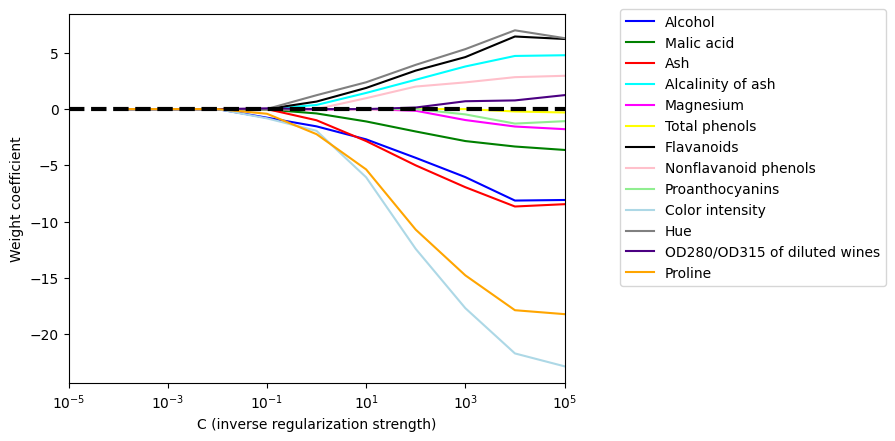

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors = ["blue", "green", "red", "cyan",
         "magenta", "yellow", "black",
         "pink", "lightgreen", "lightblue",
         "gray", "indigo", "orange"]
weights, params= [], []
for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty="l1", C=10.**c,
                          solver="liblinear",
                          multi_class="ovr", random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column],
           label=df_wine.columns[column + 1],
           color=color)
plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel("Weight coefficient")
plt.xlabel("C (inverse regularization strength)")
plt.xscale("log")
plt.legend("upper left")
ax.legend(loc="upper center",
          bbox_to_anchor=(1.38, 1.030),
          ncol=1, fancybox=True)
plt.show()

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
  def __init__(self, estimator, k_features,
               scoring=accuracy_score,
               test_size=.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state
  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=self.test_size, random_state=self.random_state)

    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train,
                             X_test, y_test, self.indices_)
    self.scores_ = [score]
    while dim > self.k_features:
      scores = []
      subsets = []

      for p in combinations(self.indices_, r=dim - 1):
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, p)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1

      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]

    return self

  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

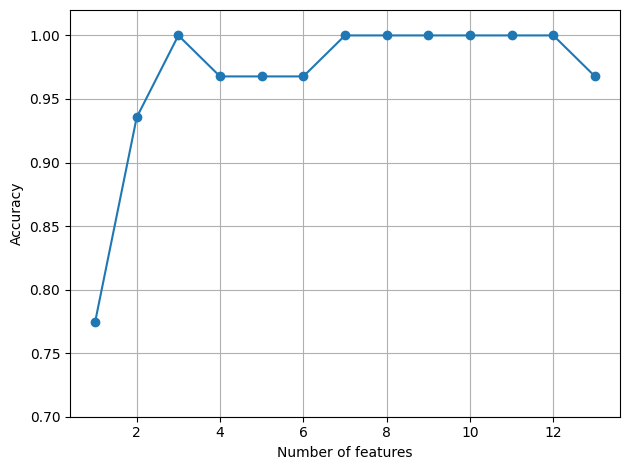

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [ ]:
knn.fit(X_train_std, y_train)
print(f"Training accuracy {knn.score(X_train_std, y_train)}")
print(f"Test accuracy {knn.score(X_test_std, y_test)}")

Training accuracy 0.967741935483871
Test accuracy 0.9629629629629629


In [ ]:
knn.fit(X_train_std[:, k3], y_train)
print(f"Training accuracy {knn.score(X_train_std[:, k3], y_train)}")
print(f"Test accuracy {knn.score(X_test_std[:, k3], y_test)}")

Training accuracy 0.9516129032258065
Test accuracy 0.9259259259259259


 1) Flavanoids                     0.217871
 2) Proline                        0.200074
 3) Color intensity                0.135774
 4) Alcohol                        0.110444
 5) OD280/OD315 of diluted wines   0.100256
 6) Hue                            0.059663
 7) Total phenols                  0.047118
 8) Magnesium                      0.042043
 9) Malic acid                     0.021211
10) Proanthocyanins                0.020764
11) Alcalinity of ash              0.020062
12) Ash                            0.014593
13) Nonflavanoid phenols           0.010127


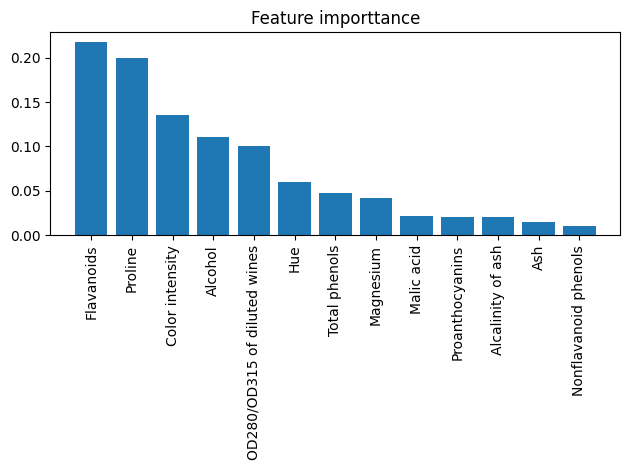

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=50,
                                random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f"%(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title("Feature importtance")
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align="center")
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()